In [139]:

import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import requests
import session_info
import upsetplot


In [140]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

In [141]:
print(
    None or True,
    None or False,
    None == None,
    None is None,
    # None + True,
    # None / False,
    type(None),
    sep="\n"
)

True
False
True
True
<class 'NoneType'>


In [142]:
#Pandas
test_missing_df = pd.DataFrame.from_dict(
    data=dict(
        x=[0, 1, np.nan, np.nan, None],
        y=[0, 1, pd.NA, np.nan, None]
    )
)

test_missing_df

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


In [143]:
pima_indians_diabetes_url = "https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"
diabetes_df = pd.read_csv(pima_indians_diabetes_url
    )
diabetes_df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [144]:
# Descargando 3 data sets

# URLs y nombres de archivos
base_url = "https://raw.githubusercontent.com/njtierney/naniar/master/data/"
datasets = {
    "oceanbuoys": "oceanbuoys.rda",
    "pedestrian": "pedestrian.rda",
    "riskfactors": "riskfactors.rda"
}

# Función para descargar archivos
def download_file(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"Archivo {filename} descargado con éxito.")
    else:
        print(f"Error al descargar el archivo {filename}: {response.status_code}")

# Descargar archivos
for name, file in datasets.items():
    download_file(base_url + file, file)

# Leer archivos .rda
data_oceanbuoys = pyreadr.read_r('oceanbuoys.rda')
data_pedestrian = pyreadr.read_r('pedestrian.rda')
data_riskfactors = pyreadr.read_r('riskfactors.rda')

# Verificar las claves en los diccionarios
print("Claves en oceanbuoys.rda:", data_oceanbuoys.keys())
print("Claves en pedestrian.rda:", data_pedestrian.keys())
print("Claves en riskfactors.rda:", data_riskfactors.keys())

# Leer DataFrames usando las claves correctas
# Reemplaza 'oceanbuoys', 'pedestrian', y 'riskfactors' con las claves correctas si son diferentes
oceanbuoys_df = data_oceanbuoys[list(data_oceanbuoys.keys())[0]]
pedestrian_df = data_pedestrian[list(data_pedestrian.keys())[0]]
riskfactors_df = data_riskfactors[list(data_riskfactors.keys())[0]]

# Mostrando los datasets
print(oceanbuoys_df.head())

print(pedestrian_df.head())

print(riskfactors_df.head())


Archivo oceanbuoys.rda descargado con éxito.
Archivo pedestrian.rda descargado con éxito.
Archivo riskfactors.rda descargado con éxito.
Claves en oceanbuoys.rda: odict_keys(['oceanbuoys'])
Claves en pedestrian.rda: odict_keys(['pedestrian'])
Claves en riskfactors.rda: odict_keys(['riskfactors'])
     year  latitude  longitude  sea_temp_c  air_temp_c   humidity  wind_ew  \
0  1997.0       0.0     -110.0   27.590000       27.15  79.599998     -6.4   
1  1997.0       0.0     -110.0   27.549999       27.02  75.800003     -5.3   
2  1997.0       0.0     -110.0   27.570000       27.00  76.500000     -5.1   
3  1997.0       0.0     -110.0   27.620001       26.93  76.199997     -4.9   
4  1997.0       0.0     -110.0   27.650000       26.84  76.400002     -3.5   

   wind_ns  
0      5.4  
1      5.3  
2      4.5  
3      2.5  
4      4.1  
  hourly_counts           date_time  year    month  month_day week_day  hour  \
0           883 2016-01-01 00:00:00  2016  January          1   Friday     0

In [145]:
oceanbuoys_df.shape, pedestrian_df.shape, riskfactors_df.shape, diabetes_df.shape

((736, 8), (37700, 9), (245, 34), (768, 9))

In [146]:
riskfactors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

In [147]:

riskfactors_df.isna()


,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [148]:
riskfactors_df.isna()



,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


RESUMEN DATOS FALTANTES


In [149]:
missing_values = riskfactors_df.isnull().sum().sum()
print(missing_values)
total_complete_values = riskfactors_df.notnull().sum().sum()
print(total_complete_values)




1186
7144


In [150]:

# Asumiendo que riskfactors_df ya está cargado

# Mostrar la forma del DataFrame
print("Forma del DataFrame:", riskfactors_df.shape)

# Obtener el número de valores faltantes por columna
missing_values = riskfactors_df.isnull().sum()

# Crear un DataFrame para tabular los datos faltantes
missing_table = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})

# Agregar una columna con el porcentaje de datos faltantes
missing_table['Percentage'] = (missing_table['Missing Values'] / riskfactors_df.shape[0]) * 100


# Mostrar la tabla de valores faltantes
print(missing_table)


Forma del DataFrame: (245, 34)
              Column  Missing Values  Percentage
0              state               0    0.000000
1                sex               0    0.000000
2                age               0    0.000000
3         weight_lbs              10    4.081633
4        height_inch               2    0.816327
5                bmi              11    4.489796
6            marital               1    0.408163
7           pregnant             215   87.755102
8           children               0    0.000000
9          education               1    0.408163
10        employment               0    0.000000
11            income               0    0.000000
12           veteran               3    1.224490
13          hispanic               2    0.816327
14    health_general               0    0.000000
15   health_physical               0    0.000000
16     health_mental               0    0.000000
17       health_poor             113   46.122449
18      health_cover               0  

In [151]:
import pandas_missing_extension

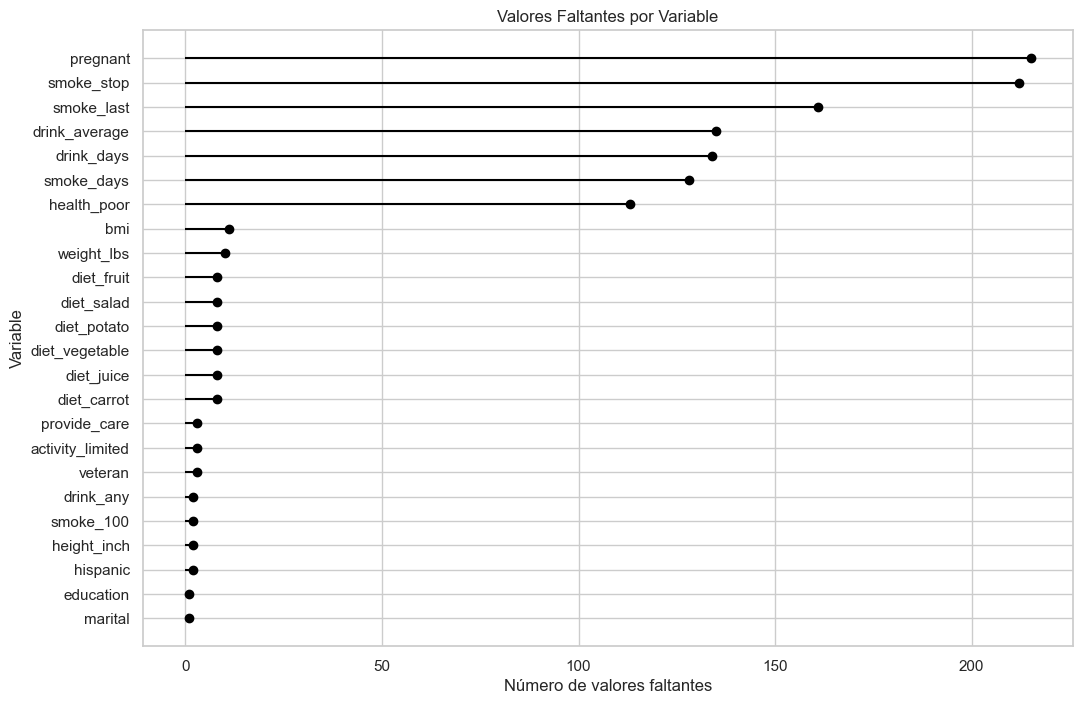

In [162]:
    #Calcula los valores faltantes
    missing_data = riskfactors_df.isnull().sum()
    missing_data = missing_data[missing_data > 0]
    missing_data.sort_values(inplace=True)
    
    # Genera la gráfica
    plt.figure(figsize=(12, 8))
    plt.hlines(y=missing_data.index, xmin=0, xmax=missing_data.values, color='black')
    plt.plot(missing_data.values, missing_data.index, 'o', color='black')
    plt.xlabel('Número de valores faltantes')
    plt.ylabel('Variable')
    plt.title('Valores Faltantes por Variable')
    plt.show()
